In [25]:
import warnings

from collections import Counter

from itertools import product

from tqdm import tqdm

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

from src.datasets import (
    alldts, get_blobs, get_linear,
    get_breast_cancer_wisconsin, get_breast_cancer_coimbra, get_german_credit,
    get_australian_credit,
)

## Test

In [ ]:
data, target = get_breast_cancer_wisconsin()
# data, target = get_blobs(n_obs=512)
X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(int(2**13), ), activation="tanh", solver="adam",
    alpha=0, beta_1=0.9, beta_2=0.999,
    max_iter=100,
    verbose=True, shuffle=False,
    early_stopping=False, validation_fraction=0.1,
    n_iter_no_change=256, tol=1e-6,
    epsilon=1e-8, learning_rate="constant",
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
accuracy_score(y_pred=model.predict(X_train), y_true=y_train), accuracy_score(y_pred=model.predict(X_test), y_true=y_test)

In [ ]:
plt.plot(model.loss_curve_)
plt.yscale("log")
plt.grid(True, "both", alpha=.3)

In [ ]:
print(classification_report(y_pred=model.predict(X_train), y_true=y_train))

In [ ]:
print(classification_report(y_pred=model.predict(X_test), y_true=y_test))

## Execute for all datasets

### solver adam

In [ ]:
res = list()

for name, (data, target) in alldts().items():
    X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

    model = MLPClassifier(
        hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
        alpha=0, beta_1=0.9, beta_2=0.999,
        max_iter=1024,
        verbose=False, shuffle=False,
        early_stopping=False, validation_fraction=0.1,
        n_iter_no_change=128, tol=1e-6,
        epsilon=1e-8, learning_rate="constant",
    )

    model.fit(X_train, y_train)

    res.append((
        name,
        accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
        accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
        model.best_loss_
    ))
    print(res[-1])

In [ ]:
for elem in res:
    print(elem)

```
('synth_linear', 0.9788388497015735, 0.9707317073170731, 0.052382419507525285)
('synth_blobs', 0.8562126966901791, 0.8634146341463415, 0.3211682111107963)
('synth_moons', 0.9739555073250136, 0.975609756097561, 0.07893427880505421)
('cred_aus', 1.0, 0.8115942028985508, 0.003973575106792552)
('cred_ger', 1.0, 0.73, 0.00016377633931161258)
('banknote', 1.0, 1.0, 9.819143678097311e-05)
('breast_coimbra', 1.0, 0.5833333333333334, 0.0016671655433862797)
('breast_wiscons', 0.998371335504886, 0.9855072463768116, 0.010349796410566922)
('haberman_surv', 0.7927272727272727, 0.7741935483870968, 0.4558088231894344)
('sonar', 1.0, 0.9047619047619048, 0.00025074506213388937)
('heart', 1.0, 0.7777777777777778, 0.0024350693271338307)
```

### solver lbfgs

In [ ]:
res = list()

for name, (data, target) in alldts().items():
    X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

    model = MLPClassifier(
        hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="lbfgs",
        alpha=0, beta_1=0.9, beta_2=0.999,
        max_iter=1024,
        verbose=False, shuffle=False,
        early_stopping=False, validation_fraction=0.1,
        n_iter_no_change=128, tol=1e-6,
        epsilon=1e-8, learning_rate="constant",
    )

    model.fit(X_train, y_train)

    res.append((
        name,
        accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
        accuracy_score(y_pred=model.predict(X_test), y_true=y_test)
    ))
    print(res[-1])

In [ ]:
for elem in res:
    print(elem)

```
('synth_linear', 1.0, 0.9317073170731708)
('synth_blobs', 0.8811720021703744, 0.8536585365853658)
('synth_moons', 0.9858925664677157, 0.9560975609756097)
('cred_aus', 1.0, 0.7681159420289855)
('cred_ger', 1.0, 0.76)
('banknote', 1.0, 1.0)
('breast_coimbra', 1.0, 0.8333333333333334)
('breast_wiscons', 1.0, 0.9420289855072463)
('haberman_surv', 0.9818181818181818, 0.6451612903225806)
('sonar', 1.0, 0.8571428571428571)
('heart', 1.0, 0.7407407407407407)
```

## Execute for specific datasets

### Coimbra

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _ in tqdm(range(30)):
        data, target = get_breast_cancer_coimbra()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=0, beta_1=0.9, beta_2=0.999,
            max_iter=2048,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=128, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append((
            accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            model.best_loss_
        ))

In [ ]:
pd.DataFrame(res)[1].plot.hist(bins=np.linspace(0, 1, 21), figsize=(5, 2))

### German Credit

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _ in tqdm(range(30)):
        data, target = get_german_credit()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=0, beta_1=0.9, beta_2=0.999,
            max_iter=2048,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=128, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append((
            accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            model.best_loss_
        ))

In [ ]:
pd.DataFrame(res)[1].plot.hist(bins=np.linspace(0, 1, 21), figsize=(5, 2))

## Define performance metrics

In [2]:
from sklearn.metrics import (
    silhouette_samples, silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
def sil_neg_samples_score(X, labels):
    res = silhouette_samples(X, labels)

    counts = Counter(res > 0)
    return counts[False] / (counts[False] + counts[True])
    
def cluster_evaluate(X, labels):
    metrics = [
        silhouette_score,
        sil_neg_samples_score,
        calinski_harabasz_score,
        davies_bouldin_score,
    ]

    return {
        metric.__name__: metric(X=X, labels=labels)
        for metric in metrics
    }

## Evaluate network weights

In [62]:
repeat = 10
alphas = [0] + list(np.logspace(-1, 1/2, num=20))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _, alpha in tqdm(list(product(range(repeat), alphas))):
        data, target = get_australian_credit()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(64, 32, 16, 8, 4, 2), activation="tanh", solver="adam",
            alpha=alpha, beta_1=0.9, beta_2=0.999,
            max_iter=1024,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=512, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)
        break

        res.append(dict({
            "alpha": alpha,
            "acc_train": accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            "acc_test": accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            "best_loss": model.best_loss_,
            "iterations": model.n_iter_
        }, **cluster_evaluate(X=np.tanh(X_train @ model.coefs_[0]), labels=y_train)))

  0%|          | 0/210 [00:09<?, ?it/s]


In [74]:
model.intercepts_

[array([ 1.34044063e-01, -1.46267967e-01, -4.83622762e-02, -5.46339085e-02,
         1.81603585e-01,  4.87010311e-05,  2.10678195e-01, -2.05909086e-01,
        -2.23362089e-01, -2.38406595e-01, -3.33710810e-01,  1.74912441e-01,
         1.35040747e-01,  1.65266936e-01,  1.64483818e-01,  9.67764108e-02,
        -1.70682469e-01, -3.00628279e-01,  8.47451483e-02,  6.44158540e-02,
        -1.84440573e-03,  2.08937360e-01, -1.14557552e-01, -1.26493702e-01,
         1.38201482e-01, -3.44923567e-01, -1.16295331e-01, -5.26017221e-03,
        -7.03834170e-02,  2.22596812e-01,  8.39052260e-02,  1.07178180e-01,
        -1.02132654e-01,  1.91586685e-01,  6.68672379e-02, -1.99926451e-02,
         1.99731823e-01,  7.59769852e-02, -2.86289192e-02, -5.07879923e-02,
         3.79526874e-02, -1.13511841e-01, -3.74350251e-01,  1.00453642e-01,
        -1.66891664e-01,  3.05126122e-01, -1.32178326e-03, -1.33579448e-01,
         1.98785917e-01, -8.08994142e-02, -2.45527838e-01, -2.00513942e-02,
         1.6

In [63]:
from functools import reduce

In [64]:
def feed_forward(a, b):
    return np.tanh(a @ b)

In [65]:
projection = reduce(feed_forward, [X_train] + model.coefs_[:-1])

In [66]:
accuracy_score(y_pred=model.predict(X_train), y_true=y_train), accuracy_score(y_pred=model.predict(X_test), y_true=y_test)

(0.9730848861283644, 0.8405797101449275)

In [67]:
Counter(y_train)

Counter({-1: 268, 1: 215})

In [68]:
Counter(y_train)

Counter({-1: 268, 1: 215})

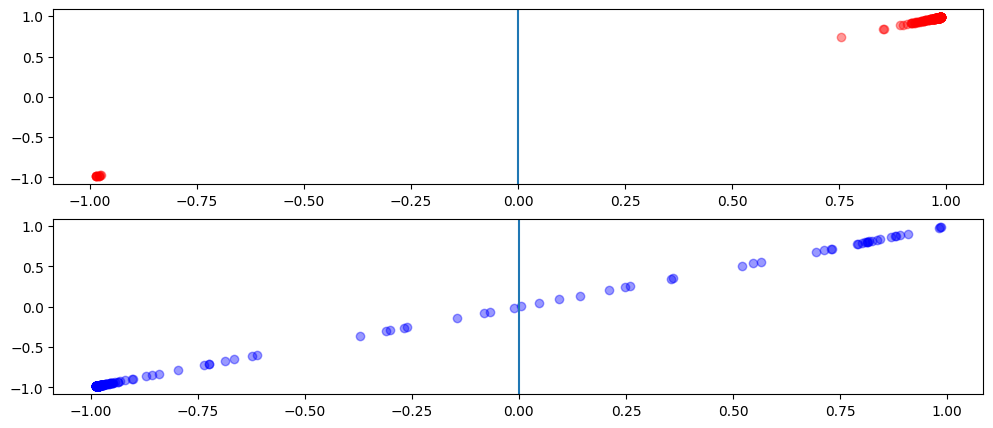

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].scatter(projection[np.where(y_train > 0)[0], 0], projection[np.where(y_train > 0)[0], 1], alpha=.4, color="red")
ax[1].scatter(projection[np.where(y_train < 0)[0], 0], projection[np.where(y_train < 0)[0], 1], alpha=.4, color="blue")
ax[0].axvline(0)
ax[1].axvline(0)

In [70]:
Counter(projection[np.where(y_train > 0)[0], 0] < 0), Counter(projection[np.where(y_train < 0)[0], 0] < 0)

(Counter({False: 205, True: 10}), Counter({True: 233, False: 35}))

In [71]:
cluster_evaluate(X=projection, labels=y_train)

{'silhouette_score': 0.7327759453396545,
 'sil_neg_samples_score': 0.09109730848861283,
 'calinski_harabasz_score': 1228.7965264025174,
 'davies_bouldin_score': 0.3549620886454462}

In [8]:
df_res = pd.json_normalize(res)

In [9]:
df_res_grouped = df_res.groupby("alpha", as_index=False).mean()
df_res_grouped

KeyError: 'alpha'

In [10]:
df_res_grouped.corrwith(df_res_grouped["acc_test"])

NameError: name 'df_res_grouped' is not defined

In [ ]:
plt.figure(figsize=(5, 2))
ax = plt.gca()

x = df_res["alpha"]
poly_train = np.poly1d(np.polyfit(df_res["alpha"], df_res["acc_train"], 1))
poly_test = np.poly1d(np.polyfit(df_res["alpha"], df_res["acc_test"], 1))

plt.plot(x, poly_train(x), label="train")
plt.plot(x, poly_test(x), label="test")
plt.legend()
plt.show()
plt.close()

: 

In [ ]:
plt.figure(figsize=(12, 5))
ax = plt.gca()

(
    df_res
    [["alpha", "acc_train"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_train"],
        c="black", edgecolors="black", alpha=.5,
        ax=ax, label="acc_train",
    )
)

(
    df_res
    [["alpha", "acc_test"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_test"],
        c="white", edgecolors="black", alpha=.5,
        ax=ax, label="acc_test",
    )
)

axt = ax.twinx()

(
    df_res
    [["alpha", "silhouette_score"]]
    .plot.scatter(
        x="alpha",
        y="silhouette_score",
        c="red", alpha=.2,
        ax=axt, label="silhouette_score"
    )
)

axt2 = ax.twinx()

(
    df_res
    [["alpha", "silhouette_neg_samples"]]
    .plot.scatter(
        x="alpha",
        y="silhouette_neg_samples",
        c="blue", alpha=.2,
        ax=axt2, label="silhouette_neg_samples"
    )
)

ax.legend(bbox_to_anchor=(0, 1), loc="lower left")
axt.legend(bbox_to_anchor=(1, 1), loc="lower right")
axt2.legend(bbox_to_anchor=(1, 1.1), loc="lower right")
axt2.spines.right.set_position(("axes", 1.1))

---